# Chapter 19 Advanced Function Topics
## Function Design Concepts
Choice about how to glue components together—for instance, 
- how to decompose a task into purposeful functions (known as cohesion)
- how your functions should communicate (called coupling)

General guidelines for readers new to function design principles:
- **Coupling** :  *use  arguments  for  inputs  and return  for  outputs* - strive to make a function independent of things outside of it. Arguments and return statements are often the best ways to isolate external dependencies to a small number of well-known places in your code.
- **Coupling** :  *use  global  variables  only  when  truly  necessary* - Global variables (i.e., names in the enclosing module) are usually **a poor way for functions to communicate**. They can create dependencies and timing issues that make programs difficult to debug, change, and reuse.
- **Coupling** : *don’t  change  mutable  arguments  unless  the  caller  expects  it* - this creates a tight coupling between the caller and callee, which can make a function too specific and brittle.
- **Cohesion** : *each  function  should  have  a  single,  unified  purpose* - When designed well, each of your functions should do one thing—something you can summarize in a simple declarative sentence. If that sentence is very broad, or contains lots of conjunctions, you might want to think about splitting it into separate and simpler functions.
- Size: *each function should be relatively small* - Keep it simple, and keep it short.
- Coupling: *avoid changing variables in another module file directly* - Use accessor functions whenever possible, instead of direct assignment statements.

Good function designers prefer to use only arguments for inputs and return statements for outputs, whenever possible.

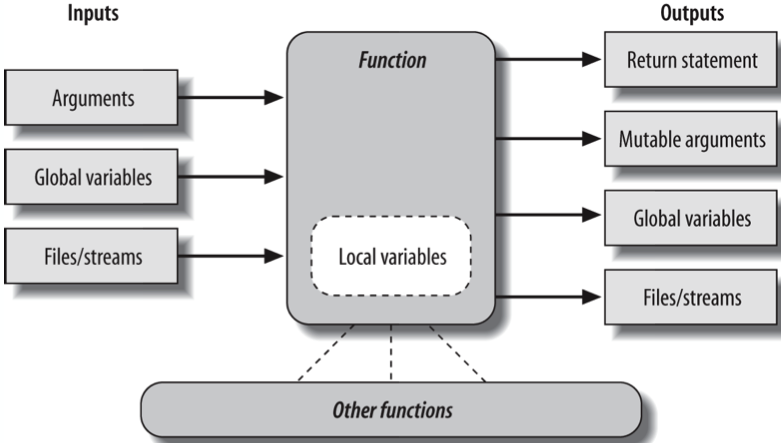

In general though, you should strive to minimize external dependencies in functions and other program components. The more self-contained a function is, the easier it will be to understand, reuse, and modify.

## Recursive Functions
Python supports recursive functions—functions that call themselves either directly or indirectly in order to loop. It allows programs to traverse structures that have arbitrary and unpredictable shapes and depths.

### Loop Statements Versus Recursion
With looping statements, we don’t require a fresh copy of a local scope on the call stack for each iteration, and we avoid the speed costs associated with function calls in general. 

### Handling Arbitrary Structures 
Recurrsion can be required to traverse arbitrarily shaped structures. Simple looping statements won’t work here because this is not a linear iteration. Nested looping statements do not suffice either, because the sublists may be nested to arbitrary depth and in an arbitrary shape—there’s no way to know how many nested loops to code to handle all cases.

#### Recursion versus queues and stacks

Python  implements  recursion by pushing information on a call stack at each recursive call, so it remembers where it must return and continue later. In fact, it’s generally possible to implement recursive-style procedures without recursive calls, by using an explicit stack or queue of your own to keep track of remaining steps.

Python limits the depth of its runtime call stack—crucial to recursive call programs—to trap infinite recursion errors. To expand it, use the sys module.

## Function Objects: Attributes and Annotations
Python functions are full-blown objects, stored in pieces of memory all their own. As such, they can be freely passed around a program and called indirectly. 

### Indirect Function Calls: “First Class” Objects 
Python functions are objects, you can write programs that process them ge- nerically. Function objects may be assigned to other names, passed to other functions, embedded in data structures, returned from one function to another, and more, as if they were simple numbers or strings.

After a def runs, the function name is simply a reference to an object—you can reassign that object to other names freely and call it through any reference:


This is usually called a first-class object model; it’s ubiquitous in Python, and a necessary part of functional programming. its motif is founded on the notion of applying func- tions, functions must be treated as data. 

arguments are passed by assigning objects, it’s just as easy to pass functions to other functions as arguments. The callee may then call the passed-in function just by adding arguments in parentheses.

can even stuff function objects into data structures

In [6]:
for a,b in [(1,2),(3,4),(5,6)]:
    print(a,b)

1 2
3 4
5 6


functions can also be created and returned for use elsewhere—the closure created in this mode also retains state from the enclosing scope.

### Function Introspection 
process functions with normal object tools. the call expression is just one operation defined to work on function objects. We can also inspect their attributes generically


In [7]:
def a(): pass
dir(a)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Introspection tools allow us to explore implementation details too—functions have attached code objects.

### Function Argument
Function objects are not limited to the system-defined attributes it’s been possible to attach arbitrary user- defined attributes to them as well.

such attributes can be used to attach state information to function objects directly, instead of using other techniques such as globals, nonlocals, and classes. Unlike nonlocals, such attributes are accessible anywhere the function itself is, even from outside its code. 

this is also a way to emulate “static locals” in other languages—variables whose names are local to a function, but whose values are retained after a function exits.  Attributes are related to objects instead of scopes.

### Function Annotations in 3.X 
Possible to attach annotation information *arbitrary user-defined data about a function’s arguments and result—to a function object*.

annotations are completely optional, and when present are simply attached to the function object’s __annotations__ attribute for use by other tools.

function annotations are coded in def header lines, as arbitrary expres- sions associated with arguments and return values. For arguments, they appear after a colon immediately following the argument’s name; for return values, they are written after a -> following the arguments list.

Calls to an annotated function work as usual, but when annotations are present Python collects them in a dictionary and attaches it to the function object itself. Argument names become keys, the return value annotation is stored under key “return” .

you can still use defaults for arguments if you code annotations—the annotation (and its : character) appear before the default (and its = character).

It’s easy to imagine annotations being used to specify constraints for argu- ment types or values, though, and larger APIs might use this feature as a way to register function interface information.

## Anonymous Functions: lambda

Like def, this expression creates a function to be called later, but it returns the function instead of assigning it to a name. This is why lambdas are sometimes known as anonymous (i.e., unnamed) functions. In practice, they are often used as a way to inline a function definition, or to defer execution of a piece of code.

### lambda Basics 
The lambda’s general form is the keyword lambda, followed by one or more arguments (exactly like the arguments list you enclose in parentheses in a def header), followed by an expression after a colon:

In [8]:
lambda a,b : a+b


<function __main__.<lambda>(a, b)>

- lambda is an expression, not a statement. Because of this, a lambda can appear in places a def is not allowed by Python’s syntax—inside a list literal or a function call’s arguments

- lambda’s body is a single expression, not a block of statements. The lambda’s body is similar to what you’d put in a def body’s return statement; you simply type the result as a naked expression, instead of explicitly returning it.

Defaults work on lambda arguments, just like in a def.
lambda expressions introduce a local scope much like a nested def, which auto- matically sees names in enclosing functions, the module, and the built-in scope (via the LEGB rule)

### Why Use lambda? 
lambda comes in handy as a sort of function shorthand that allows you to embed a function’s definition within the code that uses it. They are entirely optional—you can always use def instead, and should if your function requires the power of full statements that the lambda’s expression cannot easily provide—but they tend to be simpler coding constructs in scenarios where you just need to embed small bits of executable code inline at the place it is to be used. 

lambda is also commonly used to code jump tables, which are lists or dictionaries of actions to be performed on demand.

The lambda expression is most useful as a shorthand for def, when you need to stuff small pieces of executable code into places where statements are illegal syntactically. 

#### Multiway branch switches: The finale 
same sort of thing with dictionaries and other data structures in Python to build up more general sorts of action tables.

The code proximity that lambdas provide is especially useful for functions that will only be used in a single context

lambdas also come in handy in function-call argument lists as a way to inline temporary function definitions not used anywhere else in your program.

In [9]:
g = lambda a,b : 10 if a > 10 and b > 20 else 20
g(1,4)

20

if you need to perform loops within a lambda, you can also embed things like map calls and list comprehension expressions

That’s why lambda is limited to expres- sions. If you have larger logic to code, use def; lambda is for small pieces of inline code. 

### Scopes: lambdas Can Be Nested Too 

lambdas are the main beneficiaries of nested function scope lookup. As a review, in the following the lambda appears inside a def—the typical case—and so can access the value that the name x had in the enclosing function’s scope at the time that the enclosing function was called

The advantage of lambda over def here is that the code that handles a button press is right here, embedded in the button-creation call. In effect, the lambda defers execution of the handler until the event occurs.

## Functional Programming Tools

Python includes a set of built-ins used for functional programming—tools that apply functions to sequences and other iterables.  
- call functions on an iterable’s items (`map`); 
- filter out items based on a test function (`filter`); 
- apply functions to pairs of items and running results (`reduce`). 

### Mapping Functions over Iterables: map 
The map function applies a passed-in function to each item in an iterable object and returns a list containing all the function call results.Remember that map is an iterable. Because map expects a function to be passed in and applied, it also happens to be one of the places where lambda commonly appears

In [10]:
list(map(lambda x:x+10,[1,3,4,5]))

[11, 13, 14, 15]

Because such uses of map are equivalent to for loops, with a little extra code you can always code a general mapping utility yourself. With multiple sequences, map expects an N-argument function for N sequences.

map applies a function call to each item instead of an arbitrary expression, it is a somewhat less general tool, and often requires extra helper functions or lambdas. Moreover, wrap- ping a comprehension in parentheses instead of square brackets creates an object that generates values on request to save memory and increase responsiveness, 

### Selecting Items in Iterables: filter 
Items in the sequence or iterable for which the function returns a true result are added to the result list.

### Combining Items in Iterables: reduce 
It accepts an iterable to process, but it’s not an iterable itself—it returns a single result.

At each step, reduce passes the current sum or product, along with the next item from the list, to the passed-in  lambda function. By default, the first item in the sequence initializes the starting value.

standard library operator module, which provides functions that correspond to built- in expressions and so comes in handy for some uses of functional tools.

